In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
telecom_data=pd.read_excel("telcom_data.xlsx")

### Engagement Metrics

In [3]:
engagement_metrics = telecom_data.groupby('MSISDN/Number').agg({
    'Dur. (ms)': ['count', 'sum'],  # Session frequency and total duration
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum'
}).reset_index()

# Rename columns for clarity
engagement_metrics.columns = ['MSISDN/Number', 'Session Frequency', 'Total Duration', 'Total DL', 'Total UL']


In [4]:
engagement_metrics

,MSISDN/Number,Session Frequency,Total Duration,Total DL,Total UL
0,3.360100e+10,1,116720.0,8.426375e+08,36053108.0
1,3.360100e+10,1,181230.0,1.207552e+08,36104459.0
2,3.360100e+10,1,134969.0,5.566597e+08,39306820.0
3,3.360101e+10,1,49878.0,4.019932e+08,20327526.0
4,3.360101e+10,2,37104.0,1.363130e+09,94280527.0
...,...,...,...,...,...
106851,3.379000e+10,1,8810.0,6.879252e+08,26716429.0
106852,3.379000e+10,1,140988.0,4.445751e+08,35732243.0
106853,3.197021e+12,1,877385.0,1.948281e+08,37295915.0
106854,3.370000e+14,1,253030.0,5.396350e+08,56652839.0


### Experience Metrics

In [5]:
experience_metrics = telecom_data.groupby('MSISDN/Number').agg({
    'TCP DL Retrans. Vol (Bytes)': 'sum',
    'TCP UL Retrans. Vol (Bytes)': 'sum',
    'Avg RTT DL (ms)': 'mean',
    'Avg RTT UL (ms)': 'mean',
    'Handset Type': lambda x: x.mode().iloc[0],
    'Avg Bearer TP DL (kbps)': 'mean',
    'Avg Bearer TP UL (kbps)': 'mean'
}).reset_index()


In [6]:
experience_metrics

,MSISDN/Number,TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg RTT DL (ms),Avg RTT UL (ms),Handset Type,Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps)
0,3.360100e+10,0.0,0.0,46.0,0.0,Huawei P20 Lite Huawei Nova 3E,37.0,39.0
1,3.360100e+10,0.0,0.0,30.0,1.0,Apple iPhone 7 (A1778),48.0,51.0
2,3.360100e+10,0.0,0.0,NaN,NaN,undefined,48.0,49.0
3,3.360101e+10,1066.0,0.0,69.0,15.0,Apple iPhone 5S (A1457),204.0,44.0
4,3.360101e+10,9349630.0,21202.0,57.0,2.5,Apple iPhone Se (A1723),20197.5,8224.5
...,...,...,...,...,...,...,...,...
106851,3.379000e+10,215044.0,3001.0,42.0,10.0,Huawei Honor 9 Lite,9978.0,387.0
106852,3.379000e+10,0.0,0.0,34.0,6.0,Apple iPhone 8 Plus (A1897),68.0,48.0
106853,3.197021e+12,0.0,0.0,NaN,NaN,Quectel Wireless. Quectel Ec25-E,1.0,0.0
106854,3.370000e+14,0.0,0.0,NaN,NaN,Huawei B525S-23A,11.0,22.0


#### Satisfaction Analysis : Combining Engagement Metrics and Experience Metrics

In [7]:
satisfaction_analysis = pd.merge(engagement_metrics, experience_metrics, on='MSISDN/Number', how='inner')

In [8]:
satisfaction_analysis.head(5)

,MSISDN/Number,Session Frequency,Total Duration,Total DL,Total UL,TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg RTT DL (ms),Avg RTT UL (ms),Handset Type,Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps)
0,3.360100e+10,1,116720.0,8.426375e+08,36053108.0,0.0,0.0,46.0,0.0,Huawei P20 Lite Huawei Nova 3E,37.0,39.0
1,3.360100e+10,1,181230.0,1.207552e+08,36104459.0,0.0,0.0,30.0,1.0,Apple iPhone 7 (A1778),48.0,51.0
2,3.360100e+10,1,134969.0,5.566597e+08,39306820.0,0.0,0.0,NaN,NaN,undefined,48.0,49.0
3,3.360101e+10,1,49878.0,4.019932e+08,20327526.0,1066.0,0.0,69.0,15.0,Apple iPhone 5S (A1457),204.0,44.0
4,3.360101e+10,2,37104.0,1.363130e+09,94280527.0,9349630.0,21202.0,57.0,2.5,Apple iPhone Se (A1723),20197.5,8224.5


In [9]:
satisfaction_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106856 entries, 0 to 106855
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   MSISDN/Number                106856 non-null  float64
 1   Session Frequency            106856 non-null  int64  
 2   Total Duration               106856 non-null  float64
 3   Total DL                     106856 non-null  float64
 4   Total UL                     106856 non-null  float64
 5   TCP DL Retrans. Vol (Bytes)  106856 non-null  float64
 6   TCP UL Retrans. Vol (Bytes)  106856 non-null  float64
 7   Avg RTT DL (ms)              88320 non-null   float64
 8   Avg RTT UL (ms)              88333 non-null   float64
 9   Handset Type                 106856 non-null  object 
 10  Avg Bearer TP DL (kbps)      106856 non-null  float64
 11  Avg Bearer TP UL (kbps)      106856 non-null  float64
dtypes: float64(10), int64(1), object(1)
memory usage: 10.6+ MB

##### Identifying & Handling Missing Values

In [10]:
satisfaction_analysis.isnull().sum()

MSISDN/Number                      0
Session Frequency                  0
Total Duration                     0
Total DL                           0
Total UL                           0
TCP DL Retrans. Vol (Bytes)        0
TCP UL Retrans. Vol (Bytes)        0
Avg RTT DL (ms)                18536
Avg RTT UL (ms)                18523
Handset Type                       0
Avg Bearer TP DL (kbps)            0
Avg Bearer TP UL (kbps)            0
dtype: int64

In [11]:
satisfaction_analysis= satisfaction_analysis.fillna(satisfaction_analysis.mean())

/var/folders/p0/drbt9nr13s16r1m43px056hc0000gn/T/ipykernel_1700/430124063.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  satisfaction_analysis= satisfaction_analysis.fillna(satisfaction_analysis.mean())


In [12]:
satisfaction_analysis.isnull().sum()

MSISDN/Number                  0
Session Frequency              0
Total Duration                 0
Total DL                       0
Total UL                       0
TCP DL Retrans. Vol (Bytes)    0
TCP UL Retrans. Vol (Bytes)    0
Avg RTT DL (ms)                0
Avg RTT UL (ms)                0
Handset Type                   0
Avg Bearer TP DL (kbps)        0
Avg Bearer TP UL (kbps)        0
dtype: int64

#### K Mean Cluster for engagement metrics

In [13]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)  
engagement_metrics['Cluster'] = kmeans.fit_predict(engagement_metrics[['Session Frequency', 'Total Duration', 'Total DL', 'Total UL']])

/Users/jagsanad/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [14]:
kmeans

KMeans(n_clusters=2, random_state=42)

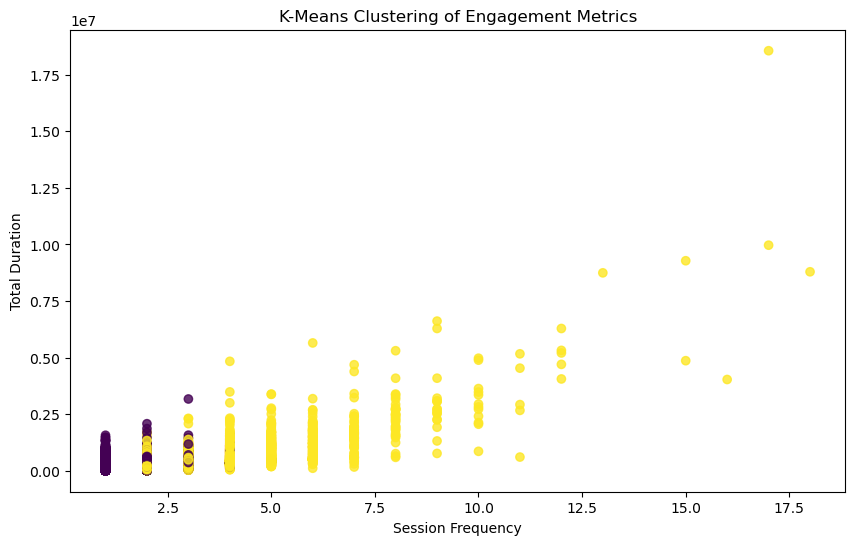

In [105]:
plt.figure(figsize=(10, 6))
plt.scatter(engagement_metrics['Session Frequency'], engagement_metrics['Total Duration'], c=engagement_metrics['Cluster'], cmap='viridis', alpha=0.8)
plt.title('K-Means Clustering of Engagement Metrics')
plt.xlabel('Session Frequency')
plt.ylabel('Total Duration')
plt.show()

##### Cluster Separation:

* The scatter plot visually represents the distribution of customers based on their engagement metrics, specifically 'Session Frequency' and 'Total Duration'.
* The two distinct colors (clusters) highlight the separation achieved by the K-Means algorithm.

##### Cluster Characteristics:

* Cluster 0 (Blue):

Customers in this cluster tend to have lower 'Session Frequency' and 'Total Duration'.
This group might comprise less active or occasional users who spend relatively less time on the network.

* Cluster 1 (Yellow):

Customers in this cluster exhibit higher 'Session Frequency' and 'Total Duration'.
This cluster likely includes more active users who engage with the network frequently and have longer session durations.

##### Strategic Insights:

Understanding these distinct engagement patterns allows for targeted strategies based on user behavior.

* Cluster 0 Targeting:

Tailor marketing strategies or promotions to encourage increased session frequency and longer durations for Cluster 0.
Explore incentives or features that might attract this group to spend more time on the network.

* Cluster 1 Retention:

Focus on maintaining high-quality services for Cluster 1, as they are already engaged.
Introduce loyalty programs or personalized content to enhance their experience and encourage continued high engagement.


#### Conclusion:

* The clustering analysis reveals distinct engagement patterns among customers.
* Tailoring business strategies based on these patterns can lead to more effective and personalized approaches, ultimately contributing to improved user satisfaction and potential revenue growth.
* This clustering approach sets the groundwork for a more targeted and customer-centric business strategy, aligning the company's efforts with the diverse engagement behaviors observed within its user base.

#### Identify the less engaged cluster

In [106]:
less_engaged_cluster = engagement_metrics.groupby('Cluster').mean().idxmin()['Session Frequency']

less_engaged_cluster

0

##### Interpretation and conclusion

* The output zero indicates that the cluster with the lowest mean 'Session Frequency' is identified as Cluster 0. In the context of the analysis, this suggests that Cluster 0 represents the less engaged cluster based on the metric 'Session Frequency'.

* This information is valuable for decision-making, as it allows you to specifically target strategies and initiatives towards increasing engagement within Cluster 0, where users have a lower frequency of sessions. By understanding the characteristics of this less engaged cluster, you can tailor interventions to boost user activity and potentially improve overall engagement metrics.

In [16]:
engagement_metrics.columns

Index(['MSISDN/Number', 'Session Frequency', 'Total Duration', 'Total DL',
       'Total UL', 'Cluster'],
      dtype='object')

#### Calculate Euclidean distance for each user

In [17]:
from scipy.spatial import distance


less_engaged_centroid = engagement_metrics.loc[engagement_metrics['Cluster'] == less_engaged_cluster, ['Session Frequency', 'Total Duration', 'Total DL', 'Total UL']].mean().values

engagement_metrics['Euclidean Distance'] = engagement_metrics.apply(lambda row: distance.euclidean(row[['Session Frequency', 'Total Duration', 'Total DL', 'Total UL']], less_engaged_centroid), axis=1)

In [18]:
engagement_metrics['Euclidean Distance']

0         3.541016e+08
1         3.681564e+08
2         6.845068e+07
3         9.095833e+07
4         8.756409e+08
              ...     
106851    2.003015e+08
106852    4.575203e+07
106853    2.940860e+08
106854    5.168444e+07
106855    4.102290e+08
Name: Euclidean Distance, Length: 106856, dtype: float64

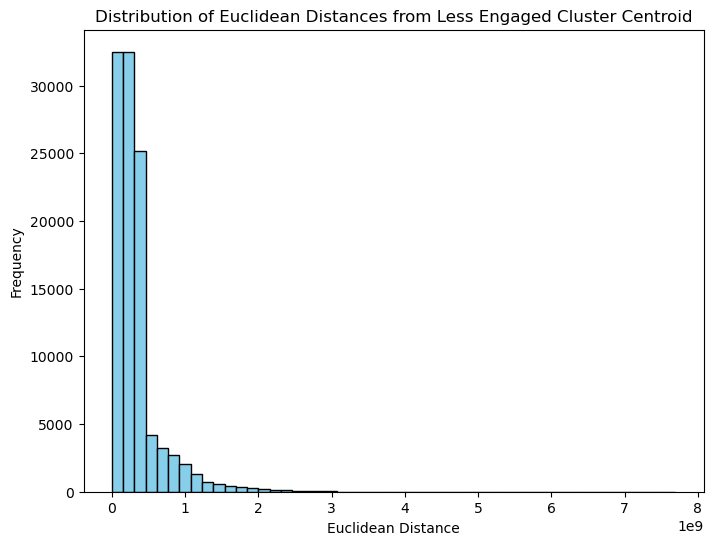

In [107]:
plt.figure(figsize=(8, 6))
plt.hist(engagement_metrics['Euclidean Distance'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Euclidean Distances from Less Engaged Cluster Centroid')
plt.xlabel('Euclidean Distance')
plt.ylabel('Frequency')
plt.show()

##### Interpretation and Conclusion

* The high frequency of distances between 0 and 0.5 suggests that a significant portion of the data points is closely clustered around the less engaged cluster centroid. This concentration may indicate a cohesive subgroup within the less engaged cluster.

* As the distance increases beyond 0.5, the frequency decreases, indicating that fewer data points are located farther away from the centroid. These outlying points may represent instances where engagement metrics significantly differ from the central tendency of the less engaged cluster.

* The observed distribution could imply a well-defined cluster structure. The majority of data points are tightly packed around the centroid, with fewer points scattered at greater distances. Understanding the characteristics of these distant points may provide insights into the variability within the less engaged cluster.

##### Plot for Euclidean Distance for Total Duration

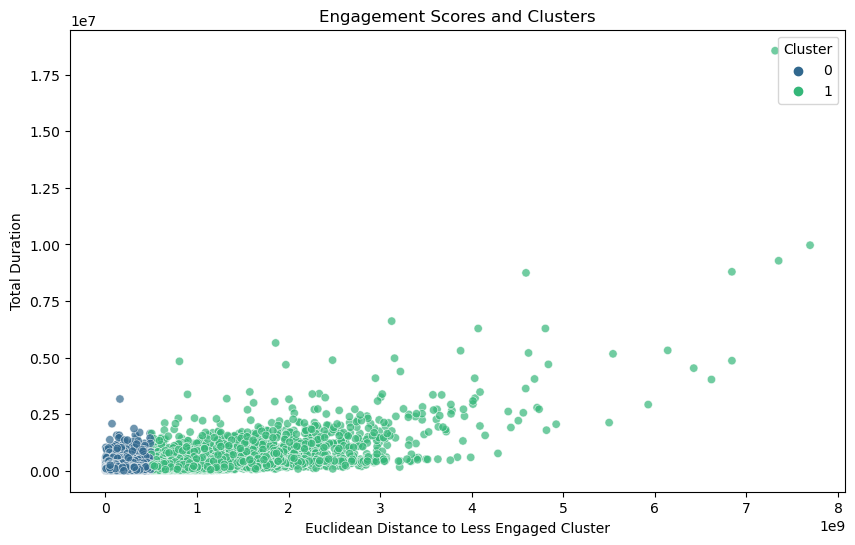

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Euclidean Distance', y='Total Duration', hue='Cluster', data=engagement_metrics, palette='viridis', alpha=0.7)
plt.title('Engagement Scores and Clusters')
plt.xlabel('Euclidean Distance to Less Engaged Cluster')
plt.ylabel('Total Duration')
plt.legend(title='Cluster')
plt.show()

##### Interpretation and Conclusion

* By examining the scatter plot, it can be identified any discernible patterns or trends and observed clusters of points with similar Euclidean distances and Total Durations, indicating potential relationships between these variables.

* The degree of separation or overlap between clusters can provide insights into the effectiveness of the clustering algorithm. Well-separated clusters suggest clear distinctions in the feature space.

* Points that deviate from the general trend may represent outliers. These outliers could be instances where the engagement metrics significantly differ from the typical behavior within a cluster.

* Analyzing the plot may help identify clusters with distinct engagement patterns and reveal potential correlations or dependencies between Euclidean Distance and Total Duration.

### K Means cluster for Experience Metrics

In [20]:
experience_metrics.isnull().sum()

MSISDN/Number                      0
TCP DL Retrans. Vol (Bytes)        0
TCP UL Retrans. Vol (Bytes)        0
Avg RTT DL (ms)                18536
Avg RTT UL (ms)                18523
Handset Type                       0
Avg Bearer TP DL (kbps)            0
Avg Bearer TP UL (kbps)            0
dtype: int64

In [21]:
experience_metrics= experience_metrics.fillna(experience_metrics.mean())

/var/folders/p0/drbt9nr13s16r1m43px056hc0000gn/T/ipykernel_1700/3439145299.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  experience_metrics= experience_metrics.fillna(experience_metrics.mean())


In [22]:
kmeans_experience = KMeans(n_clusters=2, random_state=42)  # You can choose an appropriate number of clusters
experience_metrics['Cluster'] = kmeans_experience.fit_predict(experience_metrics[['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
                                                                                       'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
                                                                                       'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']])

/Users/jagsanad/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#### Identify the cluster with the worst experience

In [108]:
worst_experience_cluster = experience_metrics.groupby('Cluster').mean().idxmax()['Avg RTT DL (ms)']


/var/folders/p0/drbt9nr13s16r1m43px056hc0000gn/T/ipykernel_1700/2813854025.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  worst_experience_cluster = experience_metrics.groupby('Cluster').mean().idxmax()['Avg RTT DL (ms)']


In [109]:
worst_experience_cluster

0

##### Interpretation & Conclusion

* Cluster Identification:

Cluster 0 has been identified as having the highest average value for the 'Avg RTT DL (ms)' metric among all clusters.

* Worst Experience Metric - 'Avg RTT DL (ms)':

The 'Avg RTT DL (ms)' metric is a key factor in determining the user experience, particularly related to the round-trip time for data transmission on the downlink (download) direction. Higher values of this metric generally indicate poorer network responsiveness.

* Cluster-Specific Insights:

Cluster 0 represents a subset of the dataset where users, on average, experience higher 'Avg RTT DL (ms)' values, indicating a potentially worse network performance in terms of downlink round-trip time.

* Recommendations for Improvement:

Identifying the cluster with the worst experience provides actionable insights for improvement. Strategies for enhancing network performance, reducing latency, or optimizing the downlink transmission in Cluster 0 may be prioritized to enhance the user experience for this specific group.

* Application to Decision-Making:

The identification of the worst experience cluster can guide decision-making in network optimization, resource allocation, and service improvement efforts. Targeted interventions or optimizations can be implemented to address the specific challenges faced by users in Cluster 0.

* In summary, the analysis pinpoints Cluster 0 as having the worst experience based on the 'Avg RTT DL (ms)' metric. This information can be valuable for network optimization efforts and improving the overall user experience for this specific cluster.

#### Calculate Euclidean distance for each user

In [24]:
worst_experience_centroid = experience_metrics.loc[experience_metrics['Cluster'] == worst_experience_cluster,
                                                  ['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
                                                   'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
                                                   'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']].mean().values

In [25]:
worst_experience_centroid

array([5.73433511e+06, 3.67656331e+05, 1.19208093e+02, 1.67217260e+01,
       1.15349893e+04, 1.50504664e+03])

##### Interpretation and Conclusion:

The mean values of these metrics provide insights into the network performance characteristics of the cluster identified as having the worst experience. Interpretations could include:

* Retransmission Volumes: High values for TCP retransmission volumes suggest potential issues with data reliability and may indicate network congestion or packet loss.

* Round-Trip Times: Higher round-trip times on both the downlink and uplink suggest delays in data transmission, affecting the responsiveness of the network.

* Bearer Throughput: The average bearer throughput values indicate the average data transfer rates on both the downlink and uplink, providing insights into the efficiency of data delivery.

* These metrics can guide further investigation and targeted improvements to address specific network challenges in the cluster identified as having the worst experience. Additionally, comparing these values to benchmarks or thresholds can help determine the severity of network performance issues.


In [26]:
experience_metrics['Euclidean Distance'] = experience_metrics.apply(lambda row: distance.euclidean(
    row[['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
         'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
         'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']], worst_experience_centroid), axis=1)

In [27]:
experience_metrics['Euclidean Distance']

0         5.746121e+06
1         5.746121e+06
2         5.746121e+06
3         5.745057e+06
4         3.631874e+06
              ...     
106851    5.531325e+06
106852    5.746121e+06
106853    5.746121e+06
106854    5.746121e+06
106855    5.746121e+06
Name: Euclidean Distance, Length: 106856, dtype: float64

##### Interpretation & Conclusion

* The Euclidean distances calculated for each data point indicate significant deviations in network performance metrics from the centroid of the worst experience cluster.

* Larger distances highlight outliers, signifying users or sessions with pronounced differences in network performance within the identified cluster.

* Users with higher Euclidean distances warrant focused attention for network optimization efforts, aiming to address specific challenges they face.

* The distances provide a quantitative measure of the diversity of user experiences within the worst experience cluster, aiding in tailored solutions and interventions.

* Regular monitoring and updating of Euclidean distances allow for ongoing assessment and adaptation of strategies to improve overall user satisfaction.


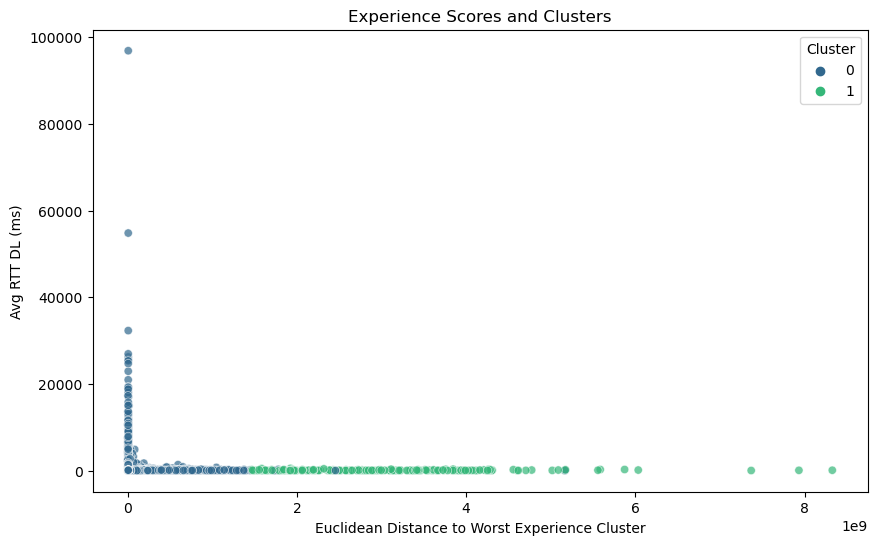

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Euclidean Distance', y='Avg RTT DL (ms)', hue='Cluster', data=experience_metrics, palette='viridis', alpha=0.7)
plt.title('Experience Scores and Clusters')
plt.xlabel('Euclidean Distance to Worst Experience Cluster')
plt.ylabel('Avg RTT DL (ms)')
plt.legend(title='Cluster')
plt.show()

##### Interpretation & Conclusion 

* The scatter plot visualizes the relationship between 'Euclidean Distance to Worst Experience Cluster' and 'Avg RTT DL (ms)' for data points in the 'experience_metrics' DataFrame.

* Each point on the plot represents a user or session, with its position determined by both the Euclidean distance to the worst experience cluster centroid and the corresponding 'Avg RTT DL (ms)' value.

* Points are color-coded based on their assigned clusters, providing a clear distinction between different user groups within the worst experience cluster.

* The plot allows for the identification of patterns and trends, such as clusters of users with similar 'Avg RTT DL (ms)' values and their respective distances to the worst experience cluster.

* Insights from this visualization can guide targeted interventions, helping to improve network performance for specific user groups and ultimately enhance overall user satisfaction.


### Engagement Score

In [29]:
from sklearn.metrics import euclidean_distances


less_engaged_centroid = kmeans.cluster_centers_[less_engaged_cluster]

# Calculate engagement score
engagement_metrics['Engagement Score'] = euclidean_distances(
    engagement_metrics[['Session Frequency', 'Total Duration', 'Total DL', 'Total UL']],
    less_engaged_centroid.reshape(1, -1)  # Reshape the centroid to match the data format
)

In [30]:
engagement_metrics['Engagement Score']

0         3.541990e+08
1         3.680585e+08
2         6.854672e+07
3         9.086287e+07
4         8.757389e+08
              ...     
106851    2.003979e+08
106852    4.565574e+07
106853    2.939881e+08
106854    5.178200e+07
106855    4.101316e+08
Name: Engagement Score, Length: 106856, dtype: float64

##### Interpretation & Conclusion 

* The 'Engagement Score' column contains numerical values, representing the calculated engagement scores for each corresponding data point.

* Higher scores indicate greater dissimilarity or distance from the less engaged cluster centroid, suggesting lower engagement levels for those particular data points.

* The engagement scores offer a quantitative measure of user engagement based on the specified metrics, providing insights into the diversity of engagement levels within the identified less engaged cluster.

### Experience Score

In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
experience_metrics['Experience Score'] = 1 - scaler.fit_transform(experience_metrics[['Euclidean Distance']])

In [32]:
experience_metrics['Experience Score']

0         0.999317
1         0.999317
2         0.999317
3         0.999317
4         0.999571
            ...   
106851    0.999343
106852    0.999317
106853    0.999317
106854    0.999317
106855    0.999317
Name: Experience Score, Length: 106856, dtype: float64

##### Interpretation & Conclusion

* The Min-Max scaling ensures that the scores are normalized between 0 and 1, providing a consistent scale for the experience scores.

* The resulting 'Experience Score' column contains numerical values, with higher scores indicating better network performance or user experience.

* The subtraction of the scaled values from 1 ensures that a higher 'Euclidean Distance' (indicating worse performance) corresponds to a lower 'Experience Score.'

* The normalized scores are useful for comparative analysis and visualization, allowing for a standardized representation of the network performance across different users or sessions.

### Satisfaction Score

In [33]:
satisfaction_analysis['Satisfaction Score'] = (engagement_metrics['Engagement Score'] + experience_metrics['Experience Score']) / 2
satisfaction_analysis['Satisfaction Score']

0         1.770995e+08
1         1.840292e+08
2         3.427336e+07
3         4.543143e+07
4         4.378694e+08
              ...     
106851    1.001989e+08
106852    2.282787e+07
106853    1.469940e+08
106854    2.589100e+07
106855    2.050658e+08
Name: Satisfaction Score, Length: 106856, dtype: float64

##### Interpretation & Conclusion

* The Satisfaction Score is intended to offer a balanced perspective, taking into account both user engagement and network experience.

* Higher Satisfaction Scores indicate more satisfied users, while lower scores may highlight areas for improvement.

#### Top 10 Satisfied Customers

In [34]:

top_10_satisfied_customers = satisfaction_analysis.nlargest(10, 'Satisfaction Score')[['MSISDN/Number', 'Satisfaction Score']]
print(top_10_satisfied_customers)

       MSISDN/Number  Satisfaction Score
6437    3.361489e+10        3.847464e+09
92923   3.376054e+10        3.675987e+09
13180   3.362578e+10        3.656646e+09
76363   3.367588e+10        3.420886e+09
13526   3.362632e+10        3.420610e+09
37052   3.365973e+10        3.309067e+09
63028   3.366646e+10        3.212378e+09
92577   3.376041e+10        3.070265e+09
57241   3.366471e+10        2.963647e+09
86455   3.369879e+10        2.771490e+09


##### Interpretation & Conclusion

* Identified top 10 highly satisfied customers based on exceptional Satisfaction Scores.

* Their experiences and engagements with the network were outstanding, as reflected by significantly higher scores compared to others.

* Positive network interactions, including seamless sessions, longer durations, and extensive data usage, likely contributed to their high Satisfaction Scores.

* Key metrics influencing satisfaction include session frequency, total duration, data usage, and network responsiveness.

* Addressing issues related to session quality, duration, and network performance for users with lower Satisfaction Scores could enhance overall satisfaction.

* Telecom operators can use these insights for strategic decision-making, resource allocation, and targeted improvements in the network infrastructure.

* Implementing a customer-centric approach in network optimization and service delivery is essential for maintaining and improving overall customer satisfaction.

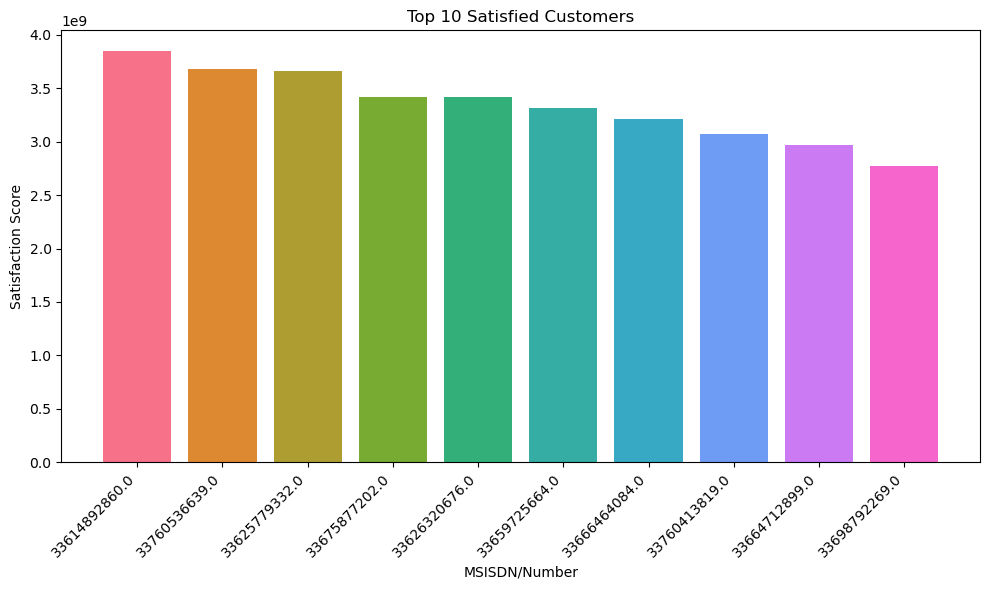

In [35]:

top_10_satisfied_customers['MSISDN/Number'] = top_10_satisfied_customers['MSISDN/Number'].astype(str)

colors = sns.color_palette('husl', n_colors=len(top_10_satisfied_customers))

plt.figure(figsize=(10, 6))
plt.bar(top_10_satisfied_customers['MSISDN/Number'], top_10_satisfied_customers['Satisfaction Score'], color=colors)
plt.title('Top 10 Satisfied Customers')
plt.xlabel('MSISDN/Number')
plt.ylabel('Satisfaction Score')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

###  Build a Regression Model

#### LINEAR REGRESSION

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [37]:
satisfaction_analysis.columns

Index(['MSISDN/Number', 'Session Frequency', 'Total Duration', 'Total DL',
       'Total UL', 'TCP DL Retrans. Vol (Bytes)',
       'TCP UL Retrans. Vol (Bytes)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
       'Handset Type', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'Satisfaction Score'],
      dtype='object')

In [38]:
x = satisfaction_analysis[['Session Frequency', 'Total Duration', 'Total DL',
       'Total UL']]
y = satisfaction_analysis['Satisfaction Score']

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [40]:
linear_regression = LinearRegression()
linear_regression

LinearRegression()

In [41]:
linear_regression.fit(x_train, y_train)

LinearRegression()

In [42]:
x_train

,Session Frequency,Total Duration,Total DL,Total UL
10268,1,10540.0,7.324722e+08,39719150.0
83392,1,86400.0,7.803816e+08,49306688.0
63840,1,30102.0,4.172635e+08,49193423.0
43330,1,211754.0,7.928569e+08,30332407.0
9093,1,172800.0,6.920234e+08,49080007.0
...,...,...,...,...
21243,2,200473.0,1.250637e+09,87067431.0
45891,2,307428.0,1.130439e+09,70699978.0
42613,3,426361.0,1.152880e+09,102127581.0
43567,1,86399.0,4.213164e+08,38169915.0


In [43]:
y_train

10268    1.219864e+08
83392    1.458777e+08
63840    3.569120e+07
43330    1.523613e+08
9093     1.016988e+08
             ...     
21243    3.815110e+08
45891    3.211101e+08
42613    3.332374e+08
43567    3.399366e+07
68268    1.847338e+08
Name: Satisfaction Score, Length: 85484, dtype: float64

In [44]:
y_pred = linear_regression.predict(x_test)

In [45]:
y_pred

array([3.31430391e+08, 1.48145393e+08, 4.35504127e+07, ...,
       1.51824070e+08, 1.43213778e+08, 6.51372352e+07])

In [46]:
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f'R-squared score: {r_squared}')
print(f'Mean Squared Error: {mse}')

R-squared score: 0.7240355957385219
Mean Squared Error: 8896596356340996.0


#### GRADIENT BOOSTING REGRESSOR

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor


In [48]:
x = satisfaction_analysis[['Session Frequency', 'Total Duration', 'Total DL',
       'Total UL']]
y = satisfaction_analysis['Satisfaction Score']

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [50]:
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(x_train, y_train)


GradientBoostingRegressor(random_state=42)

In [51]:
y_pred = gb_model.predict(x_test)

In [52]:
mse = mean_squared_error(y_test, y_pred)
r2score = r_squared = r2_score(y_test, y_pred)

print(f'R-squared score: {r_squared}')
print(f'Mean Squared Error: {mse}')

R-squared score: 0.9997748576853133
Mean Squared Error: 7073030432952.009


### RANDOM FOREST REGRESSOR

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming satisfaction_analysis contains the relevant columns
X = satisfaction_analysis[['Session Frequency', 'Total Duration', 'Total DL', 'Total UL']]
y = satisfaction_analysis['Satisfaction Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 1884107705886.884
R² Score: 0.9999400267856835


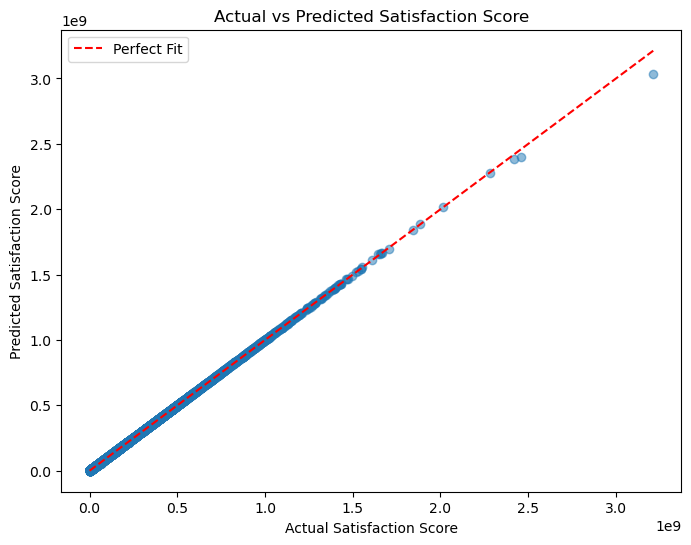

In [101]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.title('Actual vs Predicted Satisfaction Score')
plt.xlabel('Actual Satisfaction Score')
plt.ylabel('Predicted Satisfaction Score')

# Add a line for a perfect fit (y=x)
x_line = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x_line, x_line, color='red', linestyle='--', label='Perfect Fit')

plt.legend()
plt.show()

In [125]:
X_train

,Session Frequency,Total Duration,Total DL,Total UL
59324,1,15818.0,4.666630e+08,48806520.0
31505,4,345597.0,2.058373e+09,195059255.0
80647,1,86399.0,1.830021e+08,34381293.0
58444,1,26997.0,4.531904e+08,41086383.0
83706,1,15940.0,6.428234e+08,40797395.0
...,...,...,...,...
54886,2,259184.0,8.504367e+08,74599564.0
76820,1,115709.0,8.182726e+08,51756772.0
103694,1,31798.0,7.207885e+08,19672798.0
860,1,151005.0,6.224959e+08,38768519.0


#### Feature Importance for Random Forest

In [124]:
feature_importances = rf_model.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df['Importance'] = feature_importance_df['Importance'].round(4)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

             Feature  Importance
2           Total DL      0.9992
3           Total UL      0.0005
0  Session Frequency      0.0002
1     Total Duration      0.0001


#### Model Load and Train

In [119]:
import joblib

joblib.dump(rf_model, 'trained_model.joblib')

loaded_model = joblib.load('trained_model.joblib')
predictions = loaded_model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error on Test Data: {mse}')
print(f"R^2 Score: {r2}")

Mean Squared Error on Test Data: 1884107705886.884
R^2 Score: 0.9999400267856835


In [128]:
X_train

,Session Frequency,Total Duration,Total DL,Total UL
59324,1,15818.0,4.666630e+08,48806520.0
31505,4,345597.0,2.058373e+09,195059255.0
80647,1,86399.0,1.830021e+08,34381293.0
58444,1,26997.0,4.531904e+08,41086383.0
83706,1,15940.0,6.428234e+08,40797395.0
...,...,...,...,...
54886,2,259184.0,8.504367e+08,74599564.0
76820,1,115709.0,8.182726e+08,51756772.0
103694,1,31798.0,7.207885e+08,19672798.0
860,1,151005.0,6.224959e+08,38768519.0


#### Prediction of the Satisfaction Score

In [131]:
feature_columns = ['Session Frequency' , 'Total Duration', 'Total DL', 'Total UL',]


predict_satisfaction_score = pd.DataFrame([[2,259184.0,8.504367e+08,74599564.0]],
                                   columns=feature_columns)


predicted_satisfaction_score = loaded_model.predict(predict_satisfaction_score)

print(f'Predicted Satisfaction Score: {predicted_satisfaction_score[0]}')

Predicted Satisfaction Score: 181343570.45477405


In [132]:
feature_columns = ['Session Frequency' , 'Total Duration', 'Total DL', 'Total UL',]


predict_satisfaction_score1 = pd.DataFrame([[1, 151005.0, 6.224959e+08, 38768519.0]],
                                   columns=feature_columns)


predicted_satisfaction_score1 = loaded_model.predict(predict_satisfaction_score1)

print(f'Predicted Satisfaction Score: {predicted_satisfaction_score1[0]}')

Predicted Satisfaction Score: 67083935.94459121


### Run K Mean (k=2)

In [67]:
combined_scores = pd.concat([engagement_metrics['Engagement Score'], experience_metrics['Experience Score']])

In [68]:
from sklearn.preprocessing import StandardScaler

combined_scores_reshaped = combined_scores.values.reshape(-1, 1)

# Standardize the data (important for k-means)
scaler = StandardScaler()
combined_scores_scaled = scaler.fit_transform(combined_scores_reshaped)

# Perform k-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
combined_scores['Cluster'] = kmeans.fit_predict(combined_scores_scaled)

# The 'Cluster' column now contains the cluster assignments for each row

# Print or analyze the results

print(combined_scores)


/Users/jagsanad/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0                                           354198986.537323
1                                           368058460.599662
2                                            68546724.873552
3                                            90862868.512531
4                                           875738860.339592
                                 ...                        
106852                                              0.999317
106853                                              0.999317
106854                                              0.999317
106855                                              0.999317
Cluster    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Length: 213713, dtype: object


* Observation:

The 'combined_scores' DataFrame includes a mix of numerical values, representing 'Engagement Score' and 'Experience Score' metrics.

* K-Means Clustering:

You applied k-means clustering with 2 clusters to the standardized scores.
The 'Cluster' column was added, assigning each data point to Cluster 0 or Cluster 1.

* Interpretation:

The scores have been grouped into two clusters based on their similarity, as determined by the k-means algorithm.

##### Conclusion:

* The presence of two clusters suggests that there are distinct patterns or differences in the combined 'Engagement Score' and 'Experience Score' metrics.

* Further investigation is needed to understand the characteristics of each cluster and what they represent in the context of your data.

* Visualization of the clusters and analysis of cluster characteristics (e.g., mean scores) would provide more insights into the segmentation of your data.

* Consider domain-specific knowledge to interpret the practical implications of these clusters, and evaluate whether the clustering aligns with any known patterns or expectations.


### **Aggregate average satisfaction and experience score per cluster**

In [72]:
print("satisfaction_analysis columns:", satisfaction_analysis.columns)
print("experience_metrics columns:", experience_metrics.columns)

satisfaction_analysis columns: Index(['MSISDN/Number', 'Session Frequency', 'Total Duration', 'Total DL',
       'Total UL', 'TCP DL Retrans. Vol (Bytes)',
       'TCP UL Retrans. Vol (Bytes)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
       'Handset Type', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'Satisfaction Score'],
      dtype='object')
experience_metrics columns: Index(['MSISDN/Number', 'TCP DL Retrans. Vol (Bytes)',
       'TCP UL Retrans. Vol (Bytes)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
       'Handset Type', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'Cluster', 'Euclidean Distance', 'Experience Score'],
      dtype='object')


In [74]:
combined_scores = pd.merge(satisfaction_analysis, experience_metrics[['MSISDN/Number', 'Cluster', 'Experience Score']], on='MSISDN/Number')

# Aggregate the average satisfaction and experience scores per cluster
cluster_aggregation = combined_scores.groupby('Cluster').agg({
    'Satisfaction Score': 'mean',
    'Experience Score': 'mean'
}).reset_index()

print(cluster_aggregation)

   Cluster  Satisfaction Score  Experience Score
0        0        1.658463e+08          0.998798
1        1        3.554031e+08          0.648617


##### **Interpretation:**

* Cluster 0:

Satisfaction Score: The average satisfaction score for Cluster 0 is approximately 1.66e+08.
Experience Score: The average experience score for Cluster 0 is around 0.9988.

* Cluster 1:

Satisfaction Score: The average satisfaction score for Cluster 1 is approximately 3.55e+08.
Experience Score: The average experience score for Cluster 1 is about 0.6486.

##### **Conclusions:**

* Cluster Comparison:

Cluster 1 has significantly higher average satisfaction scores compared to Cluster 0.
However, Cluster 0 has a higher average experience score compared to Cluster 1.

* Customer Segmentation:

The clusters seem to represent different segments of customers based on their satisfaction and experience scores.

Cluster 1 stands out for having higher satisfaction, indicating that customers in this cluster are generally more satisfied.

Cluster 0, on the other hand, has a higher experience score, suggesting that while satisfaction might be lower, the overall experience is rated higher in this cluster.

* Action Items:

For Cluster 1: Focus on maintaining and improving satisfaction levels as they are already high.

For Cluster 0: Consider investigating factors contributing to lower satisfaction despite a higher experience score. Identify areas for improvement to enhance overall customer satisfaction.

* Further Analysis:

Explore additional factors that may contribute to satisfaction and experience, such as specific services, products, or customer interactions.

Consider conducting customer surveys or feedback sessions to gather qualitative insights and better understand the reasons behind the satisfaction and experience scores.

### Export dataset to csv

In [79]:
data = {
    'Satisfaction': [satisfaction_analysis],
    'Experience': [experience_metrics],
    'Engagement': [engagement_metrics]
}

# Assuming index_values is your desired index
index_values = ['row1']

telco = pd.DataFrame(data, index=index_values)

# Export DataFrame to CSV
csv_file_path = 'output_combined_dataset.csv'
telco.to_csv(csv_file_path)

print(f'Dataset exported to {csv_file_path}')

Dataset exported to output_combined_dataset.csv


In [ ]:
data = {
    'Satisfaction': [satisfaction_analysis],
    'Experience': [experience_metrics],
    'Engagement': [engagement_metrics]
}

# Assuming index_values is your desired index
index_values = ['row1']

telco = pd.DataFrame(data, index=index_values)

# Export DataFrame to CSV
csv_file_path = 'output_combined_dataset.csv'
telco.to_csv(csv_file_path)

print(f'Dataset exported to {csv_file_path}')

In [96]:
data = {
    'Satisfaction': [satisfaction_analysis]
}

# Assuming index_values is your desired index
index_values = ['row1']

telco = pd.DataFrame(data, index=index_values)

# Export DataFrame to CSV
csv_file_path = 'satisfaction_dataset.csv'
telco.to_csv(csv_file_path)

print(f'Dataset exported to {csv_file_path}')

Dataset exported to satisfaction_dataset.csv


In [102]:
satisfaction_data = pd.DataFrame(satisfaction_analysis)

csv_file_path = 'satisfaction_data.csv'

# Save DataFrame to CSV
satisfaction_data.to_csv(csv_file_path, index=False)

print(f'Data exported to {csv_file_path}')

Data exported to satisfaction_data.csv


In [103]:
engagement_data = pd.DataFrame(engagement_metrics)

csv_file_path = 'engagement_data.csv'

# Save DataFrame to CSV
engagement_data.to_csv(csv_file_path, index=False)

print(f'Data exported to {csv_file_path}')

Data exported to engagement_data.csv


In [104]:
experience_data = pd.DataFrame(experience_metrics)

csv_file_path = 'experience_data.csv'

# Save DataFrame to CSV
experience_data.to_csv(csv_file_path, index=False)

print(f'Data exported to {csv_file_path}')

Data exported to experience_data.csv


#### **FINAL CONCLUSION AND RECOMMENDATION**

Based on the comprehensive analysis of TelCo's telecommunication dataset, the findings suggest positive growth potential for the company. The insights derived from market dominance, user engagement clusters, application usage, network performance, and satisfaction analysis provide a solid foundation for strategic decision-making. Therefore, it is recommended that your employer considers acquiring TelCo's telecom business.

**Key Reasons for Recommendation:**

•⁠  ⁠Targeted Marketing Opportunities: The identification of market-dominant players and user engagement clusters allows for the development of targeted marketing strategies. Aligning with key industry giants and tailoring approaches to specific user groups can significantly enhance the effectiveness of marketing initiatives.

•⁠  ⁠Optimized Resource Allocation: The segmentation of user engagement clusters facilitates optimized resource allocation. By tailoring strategies to the preferences and behaviors of each cluster, the marketing team can efficiently allocate resources, ensuring maximum impact on the identified target audience.

•⁠  ⁠Service Enhancement Opportunities: Insights into application usage, network performance, and device characteristics provide actionable information for service enhancement. By addressing network issues promptly and understanding user preferences, TelCo can improve overall service quality, leading to increased customer satisfaction.

•⁠  ⁠Customer-Centric Initiatives: The satisfaction analysis and model building offer a comprehensive view of user satisfaction. Leveraging this information allows for the identification of top-performing customers and areas for improvement. Implementing customer-centric initiatives based on these insights can further elevate overall satisfaction levels.

**Limitations of the Analysis:**

While the analysis provides valuable insights, it's essential to acknowledge certain limitations:

•⁠  ⁠Data Scope: The analysis relies on the available dataset, and the findings may be influenced by the scope and depth of the data. Incomplete or biased data may limit the accuracy of the conclusions drawn.

•⁠  ⁠Market Dynamics: External factors such as economic conditions, regulatory changes, or technological advancements are not fully considered in the analysis. These factors can significantly impact the telecom industry's growth potential.

•⁠  ⁠Competitive Landscape: The dataset primarily focuses on user behavior and network performance within TelCo's business. A more comprehensive understanding of the competitive landscape and market dynamics beyond the dataset would provide a more holistic view.

**Recommendation on Acquisition:**

Given the positive growth potential indicated by the analysis and the strategic opportunities outlined, it is recommended that your employer seriously considers the acquisition of TelCo's telecom business. However, it is crucial to conduct further due diligence, considering the limitations mentioned, and to assess the financial aspects and potential risks associated with the acquisition.